# CO2 Emissions Prediction

The global transportation sector is a major polluter and in 2020 produced approximately 7.3 billion metric tons of carbon dioxide (CO2) emissions. Passenger cars were the biggest source of emissions that year, accounting for 41 percent of global transportation emissions.

In recent decades, global CO2 emissions from passenger cars have increased and peaked at 3.2 billion metric tons in 2019. Car emissions fell in 2020, but this was only due to the COVID-19 pandemic. Medium and heavy trucks are the second- largest polluters, accounting for 22 percent of transportation emissions. Although this was half the emissions of passenger cars, there are considerably fewer trucks on the road, showing just how polluting global road freight is. In 2020, heavy-duty truck CO2 emissions totaled almost two billion metric tons.

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score


from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('co2_emissions.csv')

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

There are 11 variables in this dataset with CO2 Emissions(g/km) as target variable.

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

## EDA

#### Check NULL values

In [6]:
df.isna().sum()

make                                0
model                               0
vehicle_class                       0
engine_size(l)                      0
cylinders                           0
transmission                        0
fuel_type                           0
fuel_consumption_city_(l/100_km)    0
fuel_consumption_hwy_(l/100_km)     0
fuel_consumption_comb_(l/100_km)    0
fuel_consumption_comb_(mpg)         0
co2_emissions(g/km)                 0
dtype: int64

There is no null values in this dataset.

In [8]:
categorical = [
    'make', 'model', 'vehicle_class', 'transmission', 'fuel_type'
]

numerical = [
    'engine_size(l)', 'cylinders', 'fuel_consumption_city_(l/100_km)', 
    'fuel_consumption_hwy_(l/100_km)', 'fuel_consumption_comb_(l/100_km)', 
    'fuel_consumption_comb_(mpg)'
]

#### Split datates into train/validation/test

Normally we perform EDA on df_full_train dataset. I split the data in 60% train / 20% validation / 20% test dataset.

In [9]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=13)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=13)

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_full_train = df_full_train['co2_emissions(g/km)'].values
y_train = df_train['co2_emissions(g/km)'].values
y_val = df_val['co2_emissions(g/km)'].values
y_test = df_test['co2_emissions(g/km)'].values

### Examine numerical features

In [11]:
df_full_train[numerical].describe()

,engine_size(l),cylinders,fuel_consumption_city_(l/100_km),fuel_consumption_hwy_(l/100_km),fuel_consumption_comb_(l/100_km),fuel_consumption_comb_(mpg)
count,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000
mean,3.150254,5.606127,12.560782,9.047072,10.979926,27.463439
std,1.343718,1.817492,3.501702,2.229913,2.895802,7.217029
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000


Plot histograms with kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution. Plot box plots as well to understand outliers.

<AxesSubplot:xlabel='fuel_consumption_hwy_(l/100_km)'>

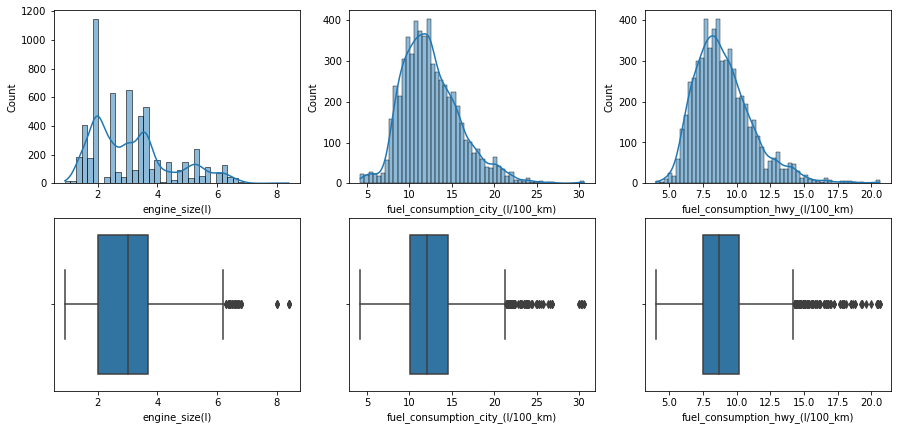

In [12]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
sns.histplot(data=df_full_train, x="engine_size(l)", kde=True, ax=axes[0, 0])
sns.histplot(data=df_full_train, x="fuel_consumption_city_(l/100_km)", kde=True, ax=axes[0, 1])
sns.histplot(data=df_full_train, x="fuel_consumption_hwy_(l/100_km)", kde=True, ax=axes[0, 2])
sns.boxplot(data=df_full_train, x="engine_size(l)", ax=axes[1, 0])
sns.boxplot(data=df_full_train, x="fuel_consumption_city_(l/100_km)", ax=axes[1, 1])
sns.boxplot(data=df_full_train, x="fuel_consumption_hwy_(l/100_km)", ax=axes[1, 2])

1. engine_size(l) feature is not normally distributed and right-skewed
2. fuel_consumption_city_(l/100_km) feature is close to normal distribution with skewed right
3. fuel_consumption_hwy_(l/100_km) feature is close to normal distribution with skewed right

This skewness to the right might be as the result of the outliers. The box plots under each feature proves this hypothesis: **engine_size(l)** with 8 litres seems as outlier as well as **fuel_consumption_city_(l/100_km)** feature with about 30 l/100_km.

<AxesSubplot:xlabel='cylinders'>

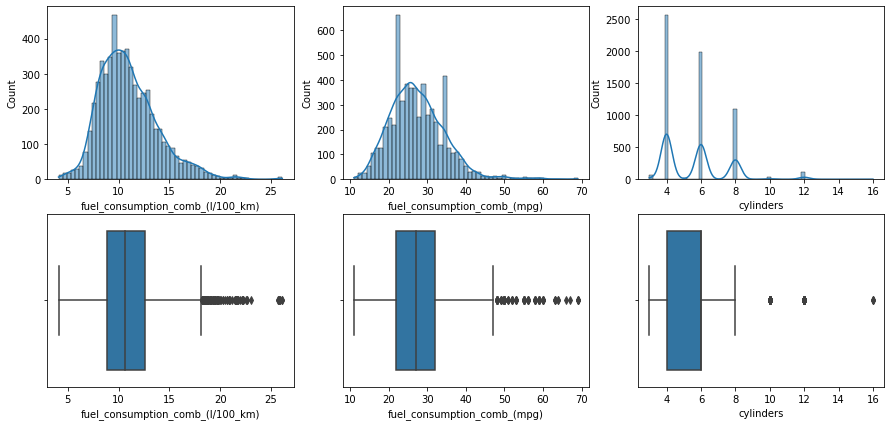

In [13]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
sns.histplot(data=df_full_train, x="fuel_consumption_comb_(l/100_km)", kde=True, ax=axes[0, 0])
sns.histplot(data=df_full_train, x="fuel_consumption_comb_(mpg)", kde=True, ax=axes[0, 1])
sns.histplot(data=df_full_train, x="cylinders", kde=True, ax=axes[0, 2])
sns.boxplot(data=df_full_train, x="fuel_consumption_comb_(l/100_km)", ax=axes[1, 0])
sns.boxplot(data=df_full_train, x="fuel_consumption_comb_(mpg)", ax=axes[1, 1])
sns.boxplot(data=df_full_train, x="cylinders", ax=axes[1, 2])

1. **fuel_consumption_comb_(l/100_km)** feature is is close to normally distributed and right-skewed
2. **fuel_consumption_comb_(mpg)** feature is close to normal distribution with skewed right
3. **cylinders** feature might be considered as categorical

This skewness to the right might be as the result of the outliers. The box plots under each feature proves this hypothesis: **fuel_consumption_comb_(l/100_km)** feature with more 25 l/100_km could be considered as outlier.

**How are numerical features correlated?**

In [14]:
df_full_train[numerical].corr()

,engine_size(l),cylinders,fuel_consumption_city_(l/100_km),fuel_consumption_hwy_(l/100_km),fuel_consumption_comb_(l/100_km),fuel_consumption_comb_(mpg)
engine_size(l),1.000000,0.927339,0.830037,0.761346,0.816093,-0.757543
cylinders,0.927339,1.000000,0.799405,0.714056,0.779192,-0.718321
fuel_consumption_city_(l/100_km),0.830037,0.799405,1.000000,0.948329,0.993798,-0.926023
fuel_consumption_hwy_(l/100_km),0.761346,0.714056,0.948329,1.000000,0.977419,-0.889425
fuel_consumption_comb_(l/100_km),0.816093,0.779192,0.993798,0.977419,1.000000,-0.924410
fuel_consumption_comb_(mpg),-0.757543,-0.718321,-0.926023,-0.889425,-0.924410,1.000000


<AxesSubplot:title={'center':'Pearson Correlation of Numerical Features'}>

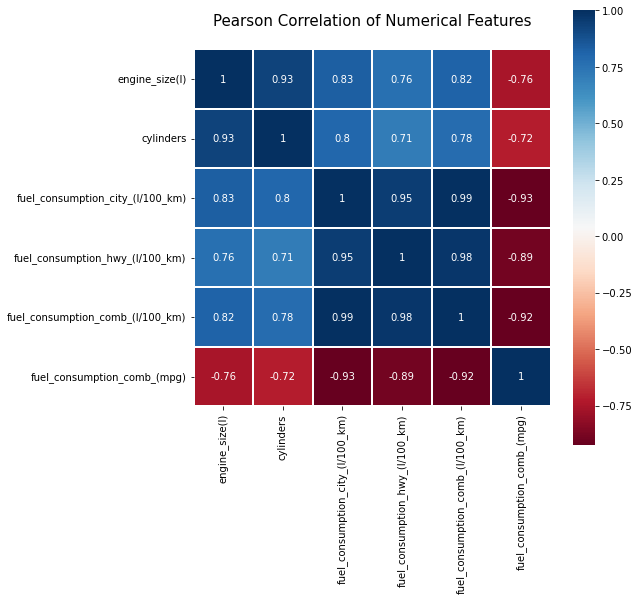

In [15]:
colormap = plt.cm.RdBu
plt.figure(figsize=(8, 8))
plt.title('Pearson Correlation of Numerical Features', y=1.05, size=15)
sns.heatmap(df_full_train[numerical].corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

As we may notice there is a high correlation between features which is not surprising given the nature of the features. In order to increase interpretability of the model I will use only **engine_size(l)**, **fuel_consumption_comb_(l/100_km)** and **fuel_consumption_comb_(mpg)** features.

### Examine categorical variables

In [16]:
df_full_train[categorical].nunique()

make               42
model            1927
vehicle_class      16
transmission       27
fuel_type           5
dtype: int64

There are a lot of variations in **make** (car producer) and **model**. In order to build a model with greater generalizing capability I will exclude these features from dataset during model training. 

#### **vehicle_class** categorical feature

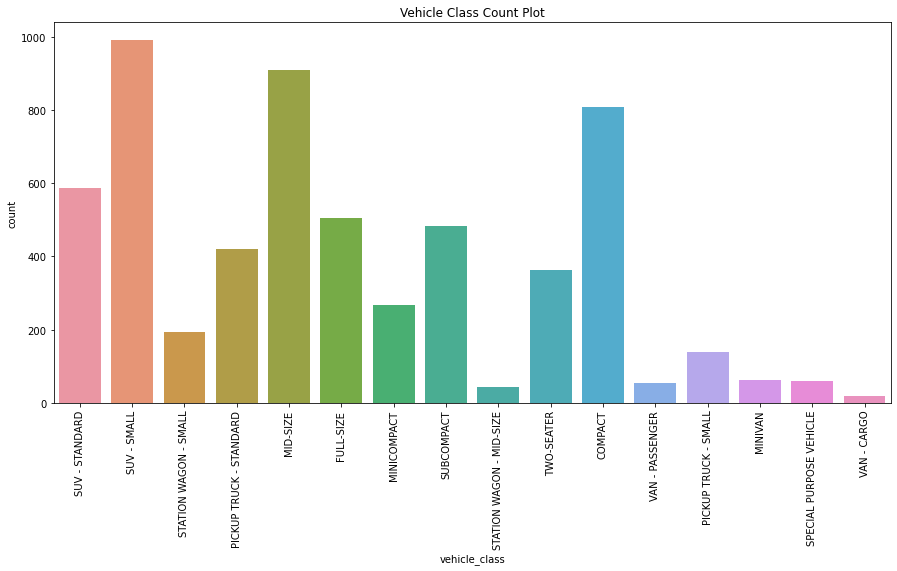

In [17]:
_, axes = plt.subplots(figsize=(15, 7))
sns.countplot(x='vehicle_class', data=df_full_train)
plt.xticks(rotation='vertical')
plt.title('Vehicle Class Count Plot')
plt.show()

It is noticable that vast majority of vehicle classes represented by *SUV-SMALL*, *MID-SIZE* and *COMPACT*.

#### **transmission** categorical feature

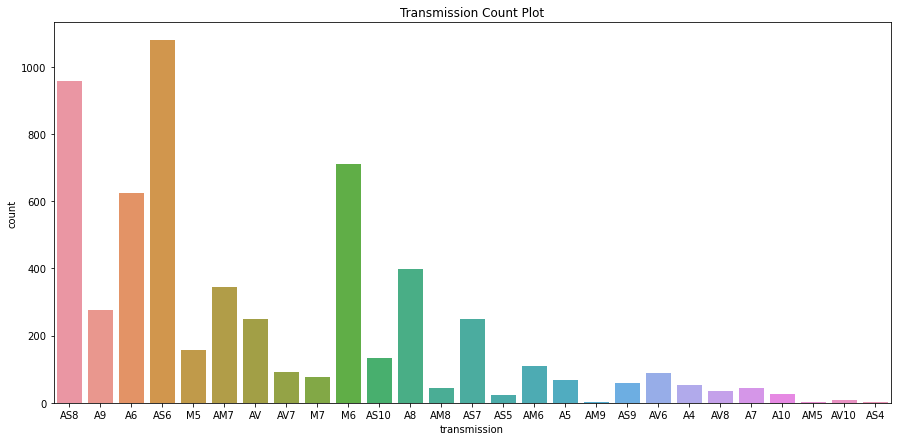

In [18]:
_, axes = plt.subplots(figsize=(15, 7))
sns.countplot(x='transmission', data=df_full_train)
plt.title('Transmission Count Plot')
plt.show()

Majority of the vehicles represented by *AS6*, *AS8*, *M6* type of transmission.

Let's examine type of transmission and number of gears separately

In [19]:
df_full_train['transmission_type'] = df_full_train['transmission'].apply(lambda row: re.split('\d+', row)[0])

/var/folders/83/dd1dp6cs4n5b8mt9sjqc20kh0000gn/T/ipykernel_6867/3374999283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_train['transmission_type'] = df_full_train['transmission'].apply(lambda row: re.split('\d+', row)[0])


In [20]:
df_full_train['transmission_gear'] = df_full_train['transmission'].apply(lambda row: re.split('[A-Z]+', row)[-1])

/var/folders/83/dd1dp6cs4n5b8mt9sjqc20kh0000gn/T/ipykernel_6867/809756074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_train['transmission_gear'] = df_full_train['transmission'].apply(lambda row: re.split('[A-Z]+', row)[-1])


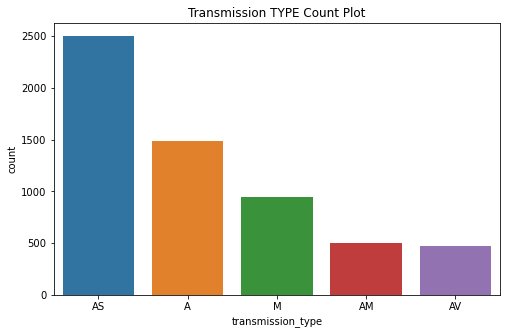

In [25]:
_, axes = plt.subplots(figsize=(8, 5))
sns.countplot(x='transmission_type', data=df_full_train)
plt.title('Transmission TYPE Count Plot')
plt.show()

The majority of the cars has AS (automatic with select shift transmission) transmission.

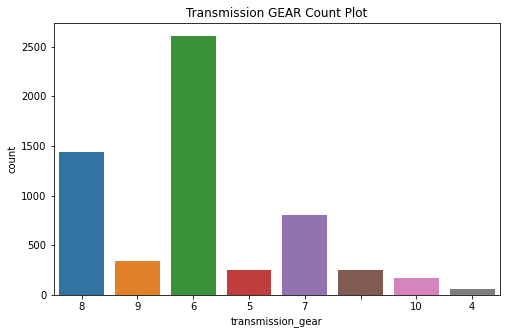

In [26]:
_, axes = plt.subplots(figsize=(8, 5))
sns.countplot(x='transmission_gear', data=df_full_train)
plt.title('Transmission GEAR Count Plot')
plt.show()

The majority of the cars has 6 and 8 gears. Some of the cars has transmission type of AV without mentioning number of gears.

#### **fuel_type** categorical feature

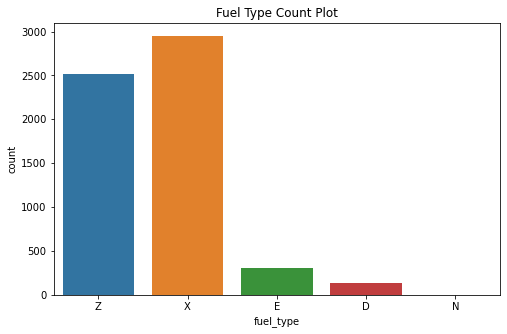

In [28]:
_, axes = plt.subplots(figsize=(8, 5))
sns.countplot(x='fuel_type', data=df_full_train)
plt.title('Fuel Type Count Plot')
plt.show()

Premium gasoline and regular gasoline are the main types of fuel used.

### Examine target variable CO2 Emissions

<AxesSubplot:xlabel='co2_emissions(g/km)'>

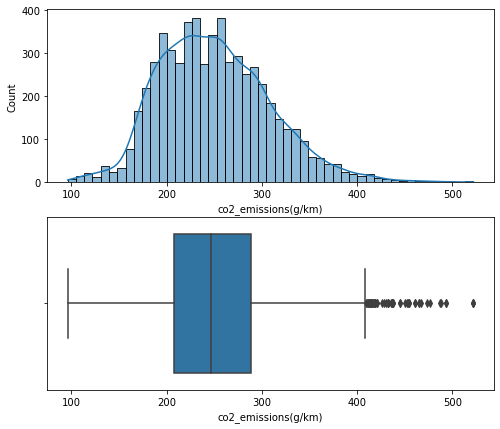

In [29]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 7))
sns.histplot(data=df_full_train, x="co2_emissions(g/km)", kde=True, ax=axes[0])
sns.boxplot(data=df_full_train, x="co2_emissions(g/km)", ax=axes[1])

Target variable close to normal distibution and slightly skewed to the right with couple of outliers. It might be helpful to apply log transformation to target variable during building the models.

<AxesSubplot:ylabel='Count'>

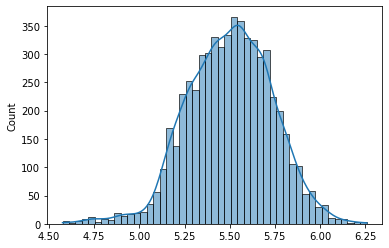

In [30]:
sns.histplot(np.log1p(y_full_train), kde=True)

**How selected numerical variables are correlated with target variable?**

<AxesSubplot:xlabel='fuel_consumption_comb_(mpg)'>

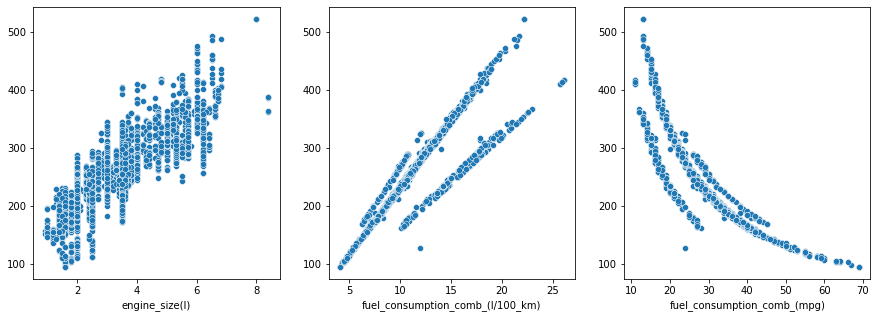

In [31]:
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.scatterplot(y=y_full_train, x=df_full_train['engine_size(l)'], ax=axes[0])
sns.scatterplot(y=y_full_train, x=df_full_train['fuel_consumption_comb_(l/100_km)'], ax=axes[1])
sns.scatterplot(y=y_full_train, x=df_full_train['fuel_consumption_comb_(mpg)'], ax=axes[2])

1. The direct correlation trend could be observed between **engine_size(l)** variable and target **co2_emissions(g/km)** variable
2. The direct correlation trend could be observed between **fuel_consumption_comb_(l/100_km)** variable and target **co2_emissions(g/km)** variable
3. An interesting observation, that behaviour of **fuel_consumption_comb_(mpg)** with respect to target variable **co2_emissions(g/km)** could be explained as hyperbolic decline

**How ALL numerical variables are correlated with target variable?**

In [32]:
df_full_train[numerical].corrwith(df_full_train['co2_emissions(g/km)'])

engine_size(l)                      0.850363
cylinders                           0.832167
fuel_consumption_city_(l/100_km)    0.916929
fuel_consumption_hwy_(l/100_km)     0.881566
fuel_consumption_comb_(l/100_km)    0.915626
fuel_consumption_comb_(mpg)        -0.906334
dtype: float64

**How categorical variables are related to target variable?**

In order to use ***mutual_info_score()*** function we need to turn our target numerical feature into categorical. 

In [33]:
q_emissions = pd.qcut(df_full_train['co2_emissions(g/km)'], q=10)

In [34]:
for cat in categorical:
    print(f'{cat} {mutual_info_score(df_full_train[cat], q_emissions):.4f}')

make 0.3889
model 1.8158
vehicle_class 0.3214
transmission 0.2702
fuel_type 0.0699


As expected **make** and **model** features show higher mututal info score compared to other categorical variables.

#### Selected features

In [38]:
selected_f = [
    'vehicle_class', 'engine_size(l)', 'transmission', 'fuel_type', 
    'fuel_consumption_comb_(l/100_km)', 'fuel_consumption_comb_(mpg)'
]

In [39]:
df_full_train = df_full_train[selected_f].reset_index(drop=True)
df_train = df_train[selected_f].reset_index(drop=True)
df_val = df_val[selected_f].reset_index(drop=True)
df_test = df_test[selected_f].reset_index(drop=True)

## Build and Assess the models